# Data Exploration and Preprocess Prototyping

#### EDA notes

- No non-unique values in 'id' (no customer is represented more than once), drop 'id' column  

- 310 NaN values in 'Arrival Delay in Minutes'  
    - data dictionary does not explicitly address this, so I assume there was no delay in those  instances  
    - I will replace NaNs here with 0s  
    - No other missing or null values found  

- Intended target variable is very imbalanced    
    Loyal Customer:       0.817322  
    disloyal Customer:    0.182678  

- Mean and standard deviation of survey answer features is fairly ubiquitous. Mean in particular hovers around 3 (scale of 1-5), indicating this particular subset of features is fairly balanced.  

- 'Class' feature is represented by 3 categories, one of which is highly under-represented. It should also be noted that first-class flights are ***not*** represented at all. This should be kept in mind when interpreting the findings at the end of the project.  
    Business: 0.477989 (dropped for OHE)
    Eco: 0.449886  
    Eco Plus: 0.072124 

- 'Travel type' is a little more than 2/3 business

- maximum delay on arrival *and* departure is ~26 hours, while minimum is exactly zero. . . as well as median and mode.




## Load and inspect raw data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

The data used is sourced from this [kaggle]("https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?select=test.csv") dataset. It comes train-test split already, with 103,904 rows in the train set, and 26,000 rows in the test set, each row includes data on 23 candidate predictive features and one pre-determined target feature ('Customer Type'). 

In [2]:
df = pd.read_csv('data/train.csv.zip',index_col=0 ,compression='zip')
df = df.drop('id',axis=True)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

## Handle missing values

310 NaN values for arrival delay feature. There are no NaN for depature delay, and both feauters contain many zeros (which is also the mode of both features). So I will be interpreting these NaN values as actually zero. I'm assuming that when there was no delay, there was no data input, so it would effectively be zero.

In [4]:
# 310 total NaN values in arrival delay column 
df.loc[df['Arrival Delay in Minutes'].isna()].shape

# replace NaNs with zeros for arrival delay feature
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].replace({np.NaN:0})

# check for any more nans 
sum(df['Arrival Delay in Minutes'].isna())

0

## Descriptive Analysis and Exploration

### Inspect object type features
Isolating features where the data type is 'object' and inspecting central tendencies and OHE efficacy. 

In [5]:
# split objects and numerics
objx = ['Gender','Customer Type','Type of Travel','Class','satisfaction']
objx_df = df[objx]
objx_df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,satisfied
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,satisfied


In [6]:
objx_df.describe()

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


In [7]:
for col in objx_df.columns:
    print(df[col].value_counts(normalize=True))
    print("\n----------------------------------\n")

Female    0.507459
Male      0.492541
Name: Gender, dtype: float64

----------------------------------

Loyal Customer       0.817322
disloyal Customer    0.182678
Name: Customer Type, dtype: float64

----------------------------------

Business travel    0.689627
Personal Travel    0.310373
Name: Type of Travel, dtype: float64

----------------------------------

Business    0.477989
Eco         0.449886
Eco Plus    0.072124
Name: Class, dtype: float64

----------------------------------

neutral or dissatisfied    0.566667
satisfied                  0.433333
Name: satisfaction, dtype: float64

----------------------------------



**observations on non-numeric data**: 
- Gender is very balanced, target (loyalty) is extremely imbalanced, 
- Travel type is > 2/3 business, 
- Ticket type is fairly balanced with one minority third class, first-class is not represented at all

### Inspect Continuous Type Data

In [8]:
# split survey data and continuos data (flight metrics)
conts = ['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']
cont_df = df[conts]

In [9]:
cont_df.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,13,460,25,18.0
1,25,235,1,6.0
2,26,1142,0,0.0
3,25,562,11,9.0
4,61,214,0,0.0


In [10]:
# good age range, good flight distance range, max delays < 30 min
cont_df.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,14.815618,15.133392
std,15.114964,997.147281,38.230901,38.649776
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


**observations on continuous data**: good age range, good flight distance range, max delays < 30 min

### Inspect Survey Data (ordinal categorical)

In [11]:
ints_df = df.drop(objx,axis=1)
survey_df = ints_df.drop(conts,axis=1)
survey_df.head()

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,3,4,3,1,5,3,5,5,4,3,4,4,5,5
1,3,2,3,3,1,3,1,1,1,5,3,1,4,1
2,2,2,2,2,5,5,5,5,4,3,4,4,4,5
3,2,5,5,5,2,2,2,2,2,5,3,1,4,2
4,3,3,3,3,4,5,5,3,3,4,4,3,3,3


In [12]:
# looks good, looks normal
survey_df.describe()

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351
std,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


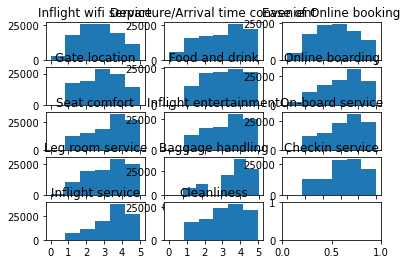

<Figure size 1080x576 with 0 Axes>

In [13]:
fig, axes = plt.subplots(5,3)
row = 0
column = 0 

for col in survey_df.columns:
    axes[row,column].hist(survey_df[col],bins=6,align='mid')
    axes[row,column].set_title(col)
    axes[row,column].set_xticks([0,1,2,3,4,5])

    column += 1 
    if column > 2:
        row += 1
        column = 0 

plt.figure(figsize=(15,8))
plt.tight_layout()
plt.subplots_adjust(hspace=0.7,wspace=2.0)
plt.show()

In [14]:
for col in survey_df.columns:
    print(col)
    print(df[col].value_counts())
    print("\n----------------------------------\n")

Inflight wifi service
3    25868
2    25830
4    19794
1    17840
5    11469
0     3103
Name: Inflight wifi service, dtype: int64

----------------------------------

Departure/Arrival time convenient
4    25546
5    22403
3    17966
2    17191
1    15498
0     5300
Name: Departure/Arrival time convenient, dtype: int64

----------------------------------

Ease of Online booking
3    24449
2    24021
4    19571
1    17525
5    13851
0     4487
Name: Ease of Online booking, dtype: int64

----------------------------------

Gate location
3    28577
4    24426
2    19459
1    17562
5    13879
0        1
Name: Gate location, dtype: int64

----------------------------------

Food and drink
4    24359
5    22313
3    22300
2    21988
1    12837
0      107
Name: Food and drink, dtype: int64

----------------------------------

Online boarding
4    30762
3    21804
5    20713
2    17505
1    10692
0     2428
Name: Online boarding, dtype: int64

----------------------------------

Seat comfort
4

In [15]:
zeros = 0
for row in survey_df.iterrows():
    zero_bool = (row[1]==0).sum() 
    if zero_bool > 0:
        zeros += 1 
print("Rows with zeros in survey:", zeros)

Rows with zeros in survey: 8200


In [16]:
# this loop replaces any zeros with the mode of the row
for row in survey_df[0:50].iterrows():
    zero_bool = (row[1]==0).sum()
    row_mode = row[1].aggregate(func='mode')
    
    if zero_bool > 0:
        print(survey_df.iloc[row[0]].replace(0,row_mode[0]))


Inflight wifi service                5
Departure/Arrival time convenient    5
Ease of Online booking               5
Gate location                        1
Food and drink                       1
Online boarding                      5
Seat comfort                         1
Inflight entertainment               1
On-board service                     4
Leg room service                     5
Baggage handling                     5
Checkin service                      3
Inflight service                     5
Cleanliness                          1
Name: 24, dtype: int64
Inflight wifi service                4
Departure/Arrival time convenient    4
Ease of Online booking               4
Gate location                        3
Food and drink                       2
Online boarding                      5
Seat comfort                         3
Inflight entertainment               4
On-board service                     4
Leg room service                     4
Baggage handling                     4
Ch

observations on sruvey data: 
- survey data appears relatively normally distributed. Some transformation may help. 
- central tendencies here are fairly consistent accross the board. 
- 0 represent "N/A" answers. consider dropping as outliers or imputing. 

## Preprocess Train-Test Split, Build Baseline Model (logistic regression)

In [17]:
objx = ['Gender','Type of Travel','Class','satisfaction']

train_df = pd.read_csv('data/train.csv.zip',compression='zip',index_col=0)
train_df.drop('id',axis=1,inplace=True)
test_df = pd.read_csv('data/test.csv.zip',compression='zip',index_col=0)
test_df.drop('id',axis=1,inplace=True)


In [18]:
# clean and OHE training set 
X_train = train_df.drop('Customer Type',axis=1)
X_train['Arrival Delay in Minutes'] = X_train['Arrival Delay in Minutes'].replace({np.NaN:0}) # handle NaNs
X_train = pd.get_dummies(X_train,drop_first=True) # one hot encoding object types 

y_train = train_df['Customer Type']
y_train = pd.get_dummies(y_train,drop_first=True)['disloyal Customer'] # 1 = disloyal

In [19]:
# impute zeros for survey data
survey = list(survey_df.columns)

for row in X_train[survey].iterrows():
    zero_bool = (row[1]==0).sum()
    row_mode = row[1].aggregate(func='mode')
    
    if zero_bool > 0:
        X_train[survey].iloc[row[0]].replace(0,row_mode[0],inplace=True)

In [20]:
# clean and OHE test set 
X_test = test_df.drop('Customer Type',axis=1)
X_test['Arrival Delay in Minutes'] = X_test['Arrival Delay in Minutes'].replace({np.NaN:0}) # handle NaNs
X_test = pd.get_dummies(X_test,drop_first=True) # one hot encoding object types

y_test = test_df['Customer Type']
y_test = pd.get_dummies(y_test,drop_first=True)['disloyal Customer'] # 1 = disloyal

In [21]:
# impute zeros for survey data
survey = list(survey_df.columns)

for row in X_test[survey].iterrows():
    zero_bool = (row[1]==0).sum()
    row_mode = row[1].aggregate(func='mode')
    
    if zero_bool > 0:
        X_test[survey].iloc[row[0]].replace(0,row_mode[0],inplace=True)

In [26]:
# X_train[survey].iloc[24].replace(0,row_mode[0],inplace=True)
X_train.iloc[24]

Age                                   23.0
Flight Distance                      452.0
Inflight wifi service                  5.0
Departure/Arrival time convenient      0.0
Ease of Online booking                 5.0
Gate location                          1.0
Food and drink                         1.0
Online boarding                        5.0
Seat comfort                           1.0
Inflight entertainment                 1.0
On-board service                       4.0
Leg room service                       5.0
Baggage handling                       5.0
Checkin service                        3.0
Inflight service                       5.0
Cleanliness                            1.0
Departure Delay in Minutes            54.0
Arrival Delay in Minutes              44.0
Gender_Male                            0.0
Type of Travel_Personal Travel         0.0
Class_Eco                              1.0
Class_Eco Plus                         0.0
satisfaction_satisfied                 1.0
Name: 24, d

### train baseline model(s)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, classification_report

In [ ]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train,y_train)

# generate y hat
train_pred = logreg.predict(X_train)
test_pred = logreg.predict(X_test)

In [ ]:
# train set prediction performance
plot_confusion_matrix(logreg,X_train,y_train,normalize='true')
print(classification_report(y_train,train_pred))
plt.show()

In [ ]:
# test set prediction performance 
plot_confusion_matrix(logreg,X_test,y_test,normalize='true')
print(classification_report(y_test,test_pred))
plt.show()

Final EDA considerations: Baseline model missclassifies the target class about 30% of the time. A great starting point considering the class imbalance. 

- deal with 0 values in survey data. I'm assuming the surveyees here just didn't answer the question, but it's about 8% of the training data so I don't want to just throw it out. Perhaps impute the average of the other survey answers?
